<a href="https://colab.research.google.com/github/Babyslam/finpro_PCVK/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import csv


original image


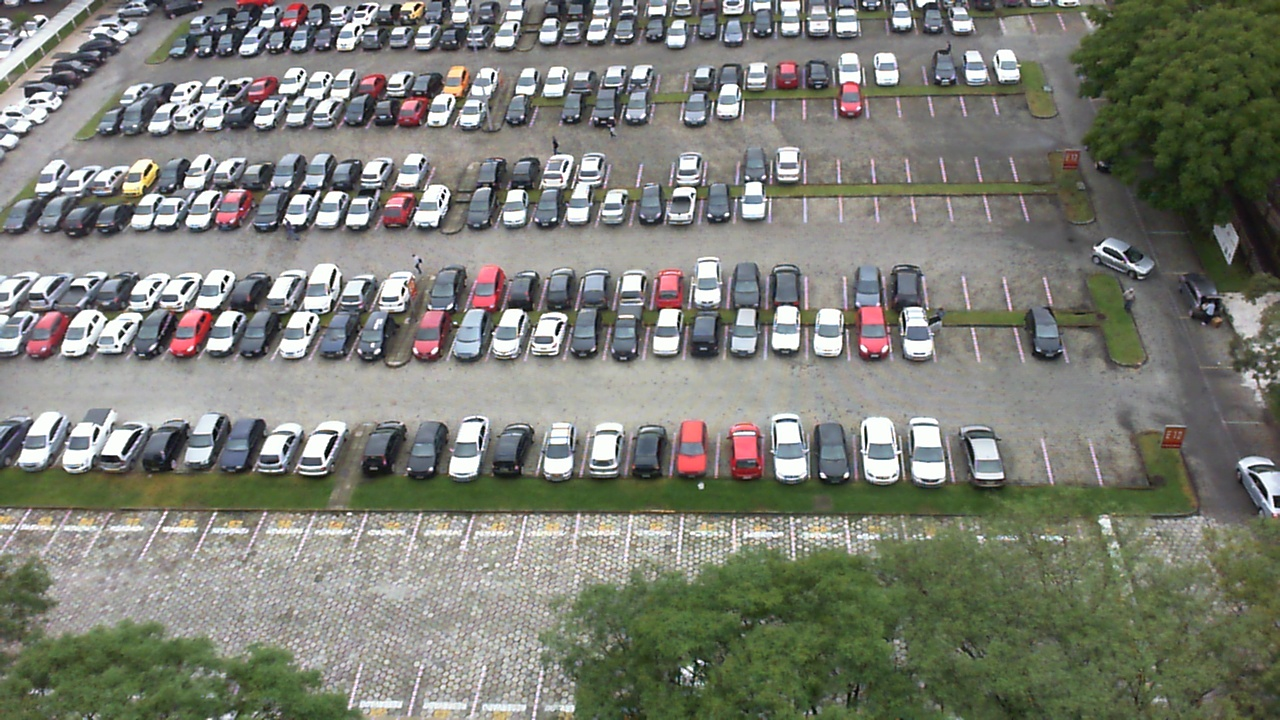

In [ ]:
carpark = cv2.imread('/content/drive/MyDrive/PCVK /Car Park/2012-11-10_08_47_45.jpg',cv2.IMREAD_UNCHANGED)
print('original image')
# image = carpark.copy()
cv2_imshow(carpark)


matplotlib image
Shape: (720, 1280, 3)


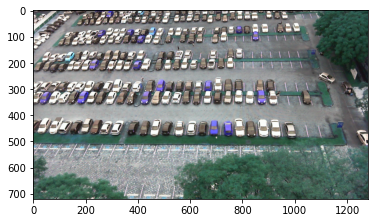

In [ ]:
print('matplotlib image')
print("Shape: {}".format(carpark.shape))
plt.imshow(carpark)

RGB matplotlib image


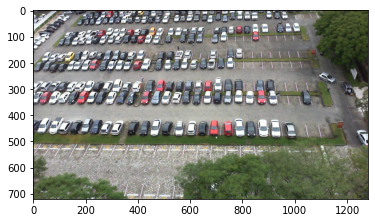

In [ ]:
print('RGB matplotlib image')
image = cv2.cvtColor(carpark, cv2.COLOR_BGR2RGB)
plt.imshow(image)

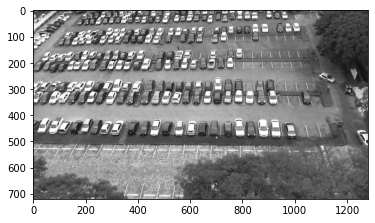

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

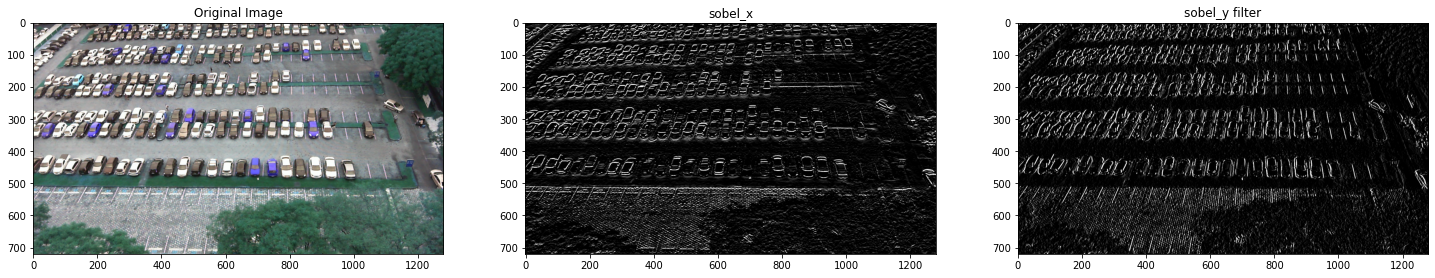

In [ ]:
image_original = cv2.imread('/content/drive/MyDrive/PCVK /Car Park/2012-11-10_08_47_45.jpg', cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filtered_image_y = cv2.filter2D(image_gray, -1, sobel_y)
filtered_image_x = cv2.filter2D(image_gray, -1, sobel_x)

(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(25, 25))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('sobel_x')
ax2.imshow(filtered_image_y, cmap='gray')
ax3.title.set_text('sobel_y filter')
ax3.imshow(filtered_image_x, cmap='gray')

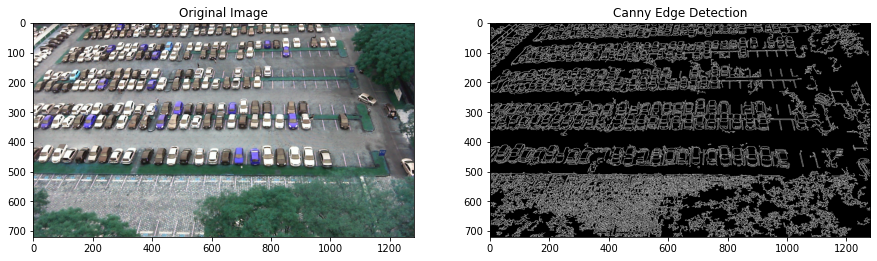

In [ ]:
image_original = cv2.imread('/content/drive/MyDrive/PCVK /Car Park/2012-11-10_08_47_45.jpg', cv2.IMREAD_COLOR)

image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Canny(image_gray, threshold1=20, threshold2=200)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Canny Edge Detection')
ax2.imshow(filtered_image, cmap='gray')